<a href="https://colab.research.google.com/github/bimarshak7/OpenCV-practice/blob/main/objectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Template Matching

In [2]:
!wget https://img.freepik.com/free-photo/pedigreed-puppy-collar-sitting-grass-park_651396-3781.jpg -q -O dog.jpg

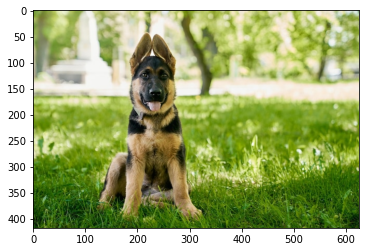

In [5]:
full = cv2.imread("dog.jpg")
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

plt.imshow(full)

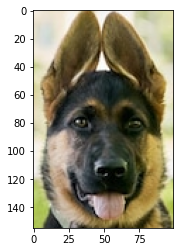

In [14]:
face = full[45:200,180:280,:]
plt.imshow(face)

In [15]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [23]:
height, width,channels = face.shape

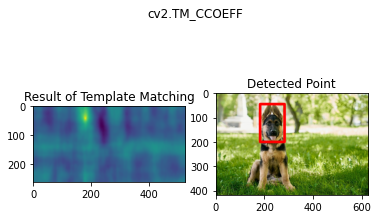

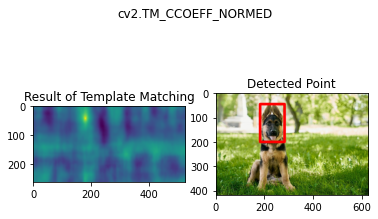

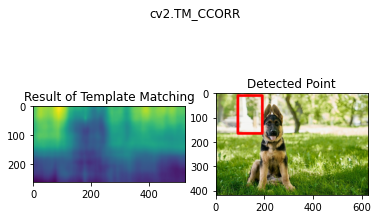

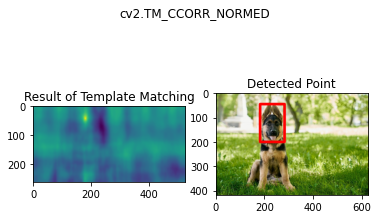

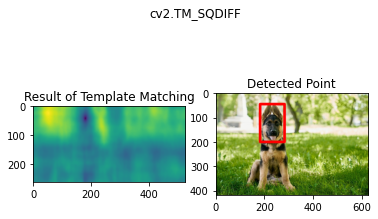

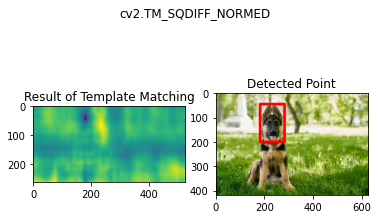

In [29]:
for m in methods:
  full_copy = full.copy()
  method = eval(m)

  res = cv2.matchTemplate(full_copy,face,method)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
  else:
        top_left = max_loc

  bottom_right = (top_left[0] + width, top_left[1] + height)
  cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

  # Plot the Images
  plt.subplot(121)
  plt.imshow(res)
  plt.title('Result of Template Matching')
    
  plt.subplot(122)
  plt.imshow(full_copy)
  plt.title('Detected Point')
  plt.suptitle(m)
  plt.show()